In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from hyppo.ksample import KSample
from lib.ranks.dst import Permuter
from lib.ranks.dst import Limiter

In [2]:
FIRST_SIZE = 100
SECOND_SIZE = 50
DIMENSION = 2
SEED = 3724

In [3]:
# creation of permuter object

In [4]:
ksample = KSample(indep_test="DCorr")
permuter = Permuter(
    ksample.statistic,
    DIMENSION,
    FIRST_SIZE, SECOND_SIZE,
    seed=SEED
)

In [5]:
# test distribution generation

In [6]:
%%time
permuter.distribution(10000)

CPU times: user 8.35 ms, sys: 36.3 ms, total: 44.7 ms
Wall time: 6.91 s


array([-0.01351227, -0.01319183, -0.01308588, ...,  0.06550693,
        0.06988841,  0.0777506 ], dtype=float32)

In [7]:
%%time
permuter.distribution(
    10000, seeds=[2342, 1234, 8578, 4326])

CPU times: user 5.57 ms, sys: 32.1 ms, total: 37.7 ms
Wall time: 3.72 s


array([-0.01344354, -0.01339631, -0.01336522, ...,  0.06031908,
        0.06325199,  0.06892849], dtype=float32)

<AxesSubplot:ylabel='Count'>

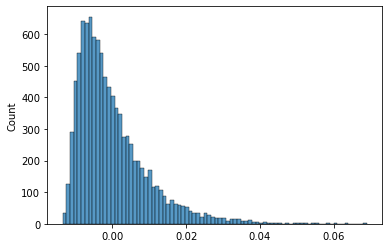

In [8]:
sns.histplot(permuter.dst)

In [9]:
# creation of limiter object

In [10]:
ksample = KSample(indep_test="Dcorr")
limiter = Limiter(
    ksample.statistic,
    DIMENSION,
    FIRST_SIZE, SECOND_SIZE,
    seed=SEED
)

In [11]:
# test distribution generation

In [12]:
%%time
limiter.distribution(10000)

CPU times: user 4.57 ms, sys: 20.9 ms, total: 25.5 ms
Wall time: 7.98 s


array([-0.01379219, -0.01377838, -0.01370302, ...,  0.0769055 ,
        0.07873206,  0.10188852], dtype=float32)

In [13]:
%%time
limiter.distribution(
    10000, seeds=[2342, 1234, 8578, 4326])

CPU times: user 5.69 ms, sys: 29.8 ms, total: 35.5 ms
Wall time: 4.17 s


array([-0.01386798, -0.01337156, -0.01333312, ...,  0.06302458,
        0.06770811,  0.06897521], dtype=float32)

<AxesSubplot:ylabel='Count'>

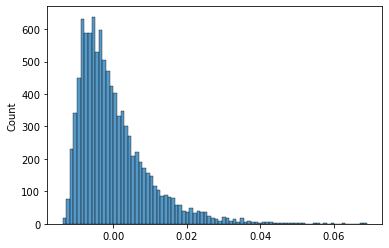

In [14]:
sns.histplot(limiter.dst)

<AxesSubplot:xlabel='value', ylabel='Density'>

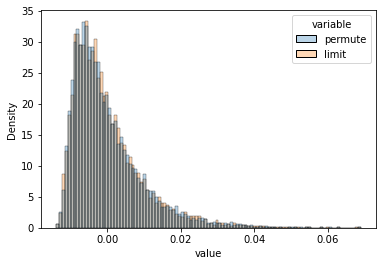

In [15]:
sns.histplot(
    x="value",
    hue="variable",
    data=pd.DataFrame(
        columns=["permute", "limit"],
        data=zip(permuter.dst, limiter.dst)
    ).melt(),
    alpha=0.3,
    stat="density"
)